In [81]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler , minmax_scale  , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score , f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from scipy.stats import shapiro,mannwhitneyu,chi2_contingency

In [45]:
#Read the dataset
data = pd.read_excel(r"C:\Users\DELL\Downloads\Problem Statement\Dataset.xlsx")

In [46]:
#Checking the Null Values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Target                     0
dtype: int64

# Dataset contains zero null values

In [47]:
#Understanding the data distrubution
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Here mean values are too less than than the max value, suggesting strongly right skewed distributions of values in variables

In [48]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Target                        bool
dtype: object

OperatingSystems , Browser , Region and TrafficType are appeared as numerical, but actually they are categorical variables, so we are going to convert them into categories.



In [49]:
cat_cols = ['Month','OperatingSystems', 'Browser', 'Region',
           'TrafficType', 'VisitorType', 'Weekend', 'Target']
for col in cat_cols:
    data[col] = data[col].astype('category')

In [50]:
data.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Target                     category
dtype: object

# =====================================================


# Exploratory Data Analysis

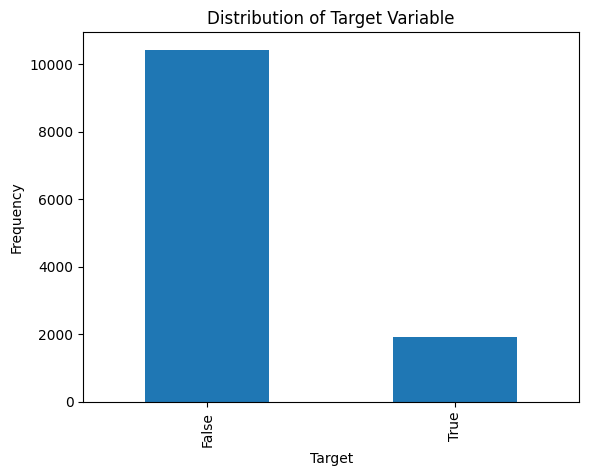

In [51]:
#Distribution of the Target variable
data['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

# This indicates a clear imbalance in the target variable, with the "False" class being much more prevalent than the "True" class, suggesting that this dataset is imbalanced

In [52]:
print(round(sum(data['Target'])/len(data['Target']), 2)*100, "% of values are True")

15.0 % of values are True


# Since there is an imblanaced data in our label values (more falses than trues) we will use a stratified sampling approach when splitting the data into training and test data and use F1 score to assess model performance.

In [53]:
#Understanding the type of Visitors
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

# There are 85 'other' type of visitors and as of now we have no idea about them , so we will keep them

Text(0, 0.5, 'Number of Visitors')

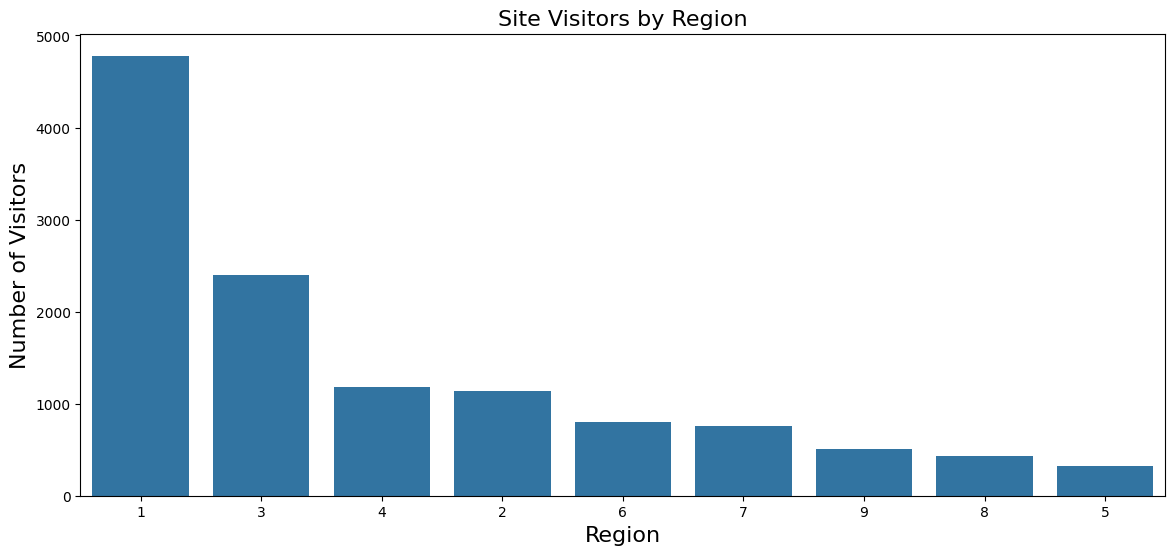

In [54]:
#Visitors counts by the region
plt.figure(figsize = (14,6))
sns.countplot(x = "Region", data = data, 
              order = data['Region'].value_counts().index)
plt.title("Site Visitors by Region", fontsize = 16)
plt.xlabel("Region", fontsize = 16)
plt.ylabel("Number of Visitors", fontsize = 16)

# The region with the most visitors is region 1 , but we don't know where exactly they are , so again we have to keep them

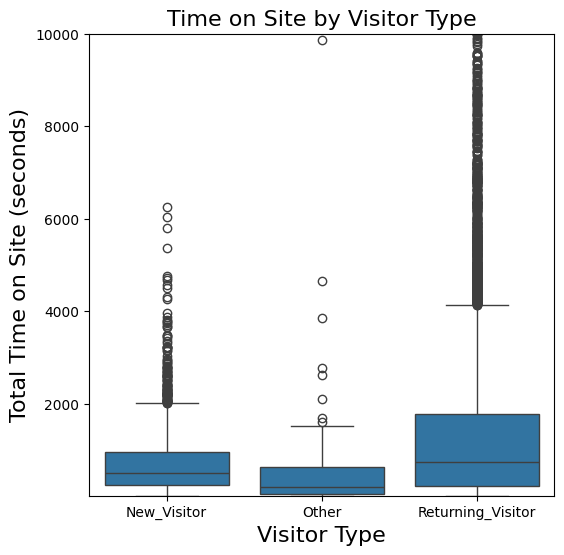

In [55]:
#Time on site by visitor type
dur = data[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']].sum(axis=1)
site_duration = pd.DataFrame({"VisitorType": data['VisitorType'],"TotalDuration": dur})
plt.figure(figsize=(6, 6))
sns.boxplot(x='VisitorType', y='TotalDuration', data=site_duration)
plt.title("Time on Site by Visitor Type", fontsize=16)
plt.xlabel("Visitor Type", fontsize=16)
plt.ylabel("Total Time on Site (seconds)", fontsize=16)
plt.ylim(10, 10000)
plt.show()

# New_Visitor and Other types have a relatively similar range, with lower total time on site compared to Returning_Visitor.
# Returning_Visitor shows a wider range and higher median, suggesting these visitors tend to spend more time on the site.

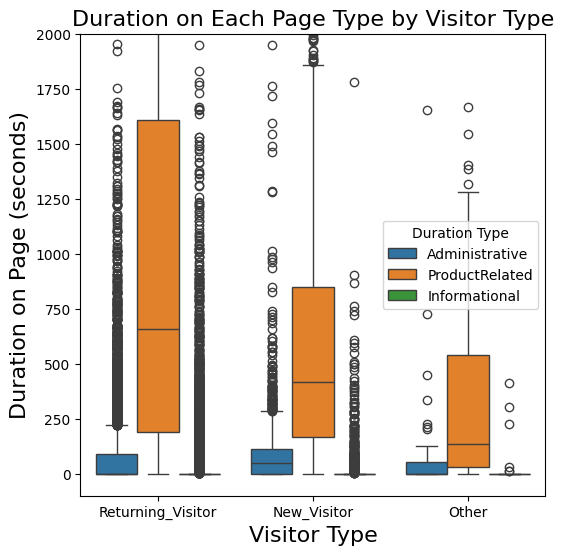

In [56]:
#Duration on Each Page Type by Visitor Type
duration = list(data['Administrative_Duration']) + list(data['ProductRelated_Duration']) + list(data['Informational_Duration'])
duration_type = (list(itertools.repeat('Administrative', len(data['Administrative_Duration']))) 
                 +list(itertools.repeat('ProductRelated', len(data['ProductRelated_Duration']))) 
                 +list(itertools.repeat('Informational', len(data['Informational_Duration']))))
visitor_type = list(data['VisitorType']) * 3
duration_info = pd.DataFrame({ "Visitor Type": visitor_type, "Duration Type": duration_type, "Duration": duration})
plt.figure(figsize=(6, 6))
sns.boxplot(x='Visitor Type', y='Duration', data=duration_info, hue='Duration Type')
plt.title("Duration on Each Page Type by Visitor Type", fontsize=16)
plt.xlabel("Visitor Type", fontsize=16)
plt.ylabel("Duration on Page (seconds)", fontsize=16)
plt.ylim(-100, 2000)
plt.show()

# customers spend longer on the product related portion of the website, and it appears as though new visitors spend a little longer than returning visitors on the administrative parts of the website.

In [57]:
#correlation between exit and bounce rates
correlation = data[['BounceRates','ExitRates']].corr()
correlation

,BounceRates,ExitRates
BounceRates,1.000000,0.913004
ExitRates,0.913004,1.000000


# There is high positive correlation between BounceRates and ExitRates

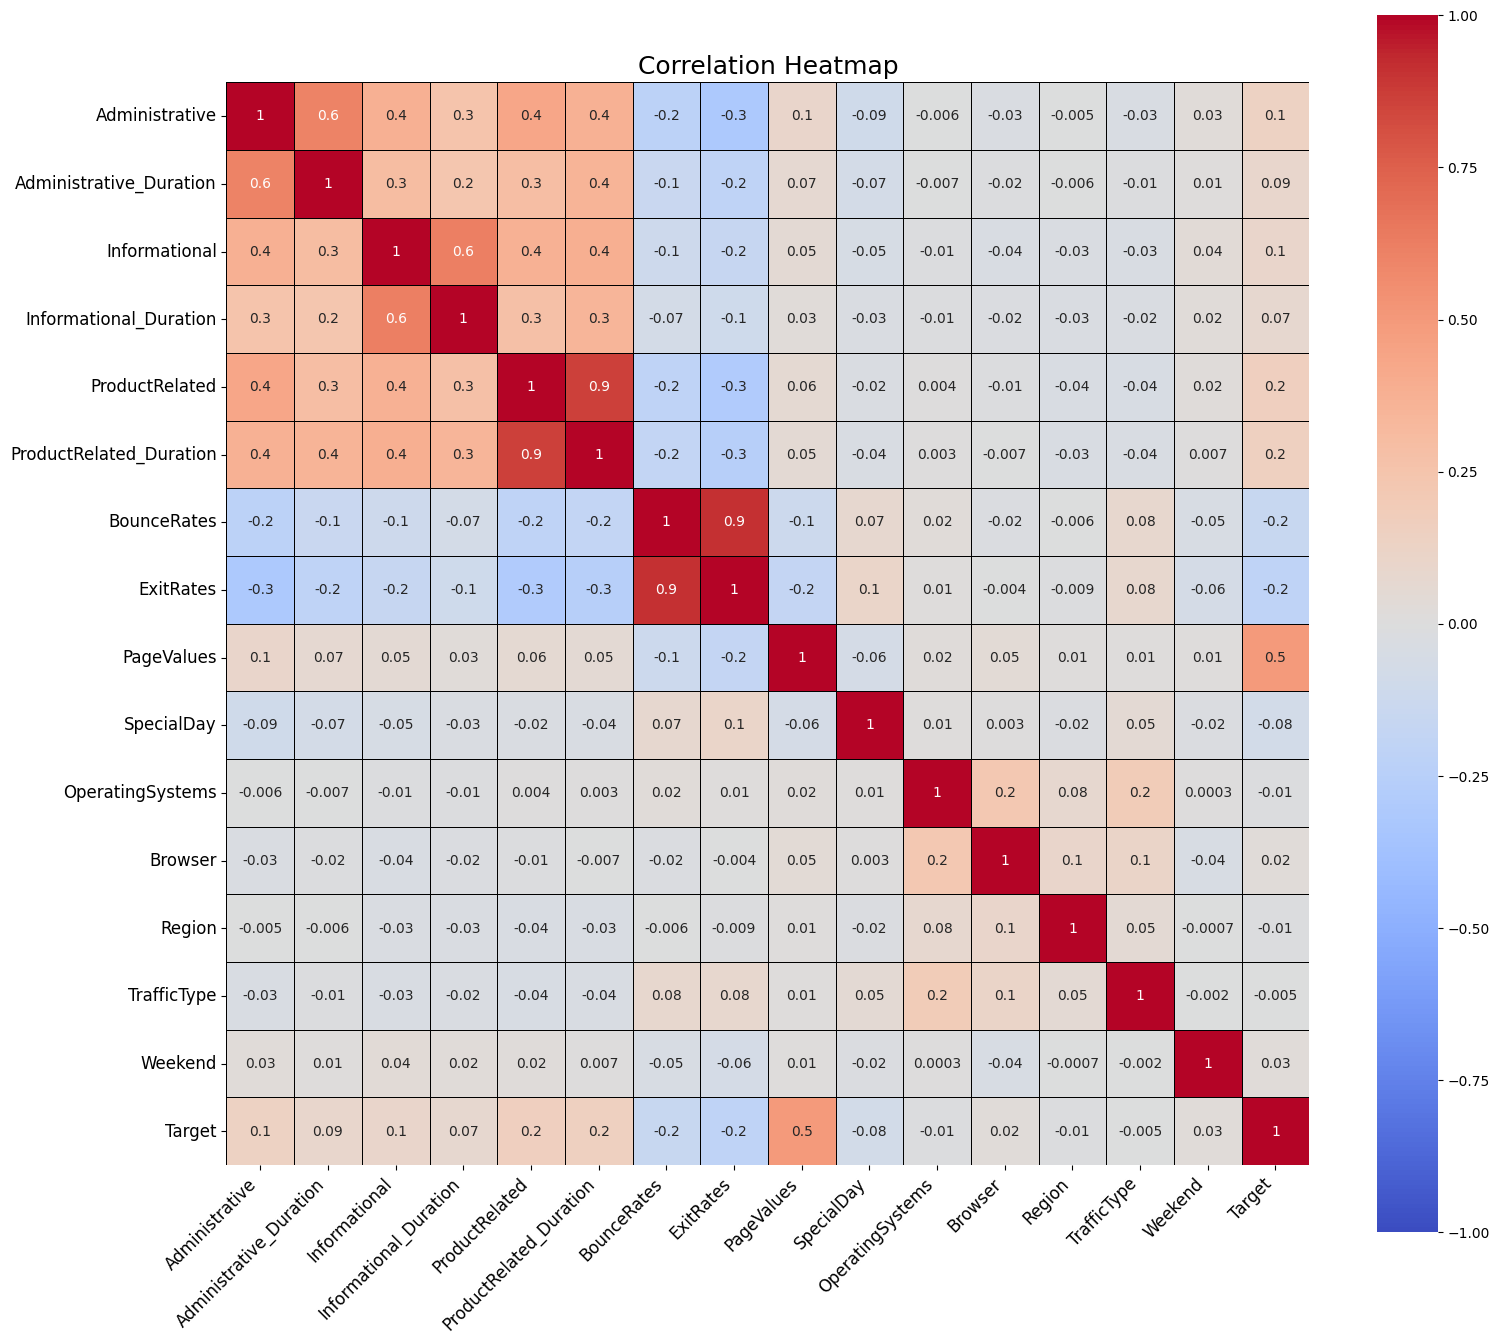

In [58]:
data_copy = data.drop(['Month','VisitorType'],axis=1)
plt.figure(figsize=(16, 16))
sns.heatmap(data_copy.corr(),annot=True, fmt='.1g',cmap='coolwarm',linewidths=0.5,linecolor='black',cbar_kws={"shrink": .8},square=True,vmin=-1, vmax=1)          
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for better readability
plt.yticks(rotation=0, fontsize=12)                # Rotate y labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# There is a high correlation with page values and revenue
# Bounces rates got negative influence on revenue
# There is high volume Target from product related pages

In [59]:
#Visualzing Target Count per Month
Month_result = data.groupby(['Month','Target'])['Target'].agg(['count']).reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15336\2342648049.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Month_result = data.groupby(['Month','Target'])['Target'].agg(['count']).reset_index()


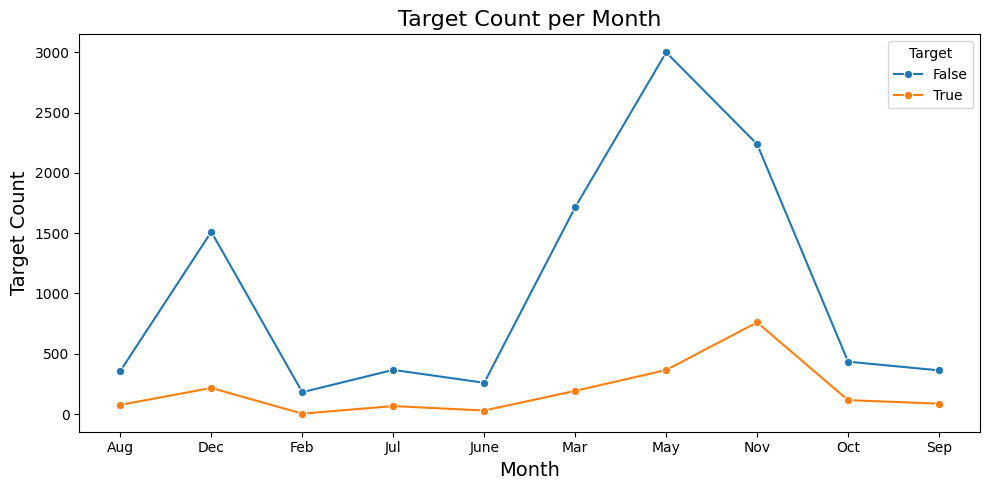

In [60]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='count', hue='Target', marker='o', data=Month_result)
plt.title('Target Count per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Target Count', fontsize=14)
plt.tight_layout()
plt.show()

# Based on our exploratory data analysis the best predictor would be a returning visitor
# and Month that visitor accessed the site (if it's May, Mar, Nov, Dec = higher probability )

# =====================================================

# Feature Cleaning
# 1.Statistical Tests
# 2.Using Domain Knowledge

In [61]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

In [62]:
#check weather Revenue is influenced by administrative column 
#H0=proportion of revenue accross all the administrative category is same
#H1=proportion of revenue at least in two administrative category is different
scol=[]
spval=[]
ss=[]
for n in cat_cols:
    scol.append(n)
    cp=chi2_contingency(pd.crosstab(data[n],data['Target']))[1]
    spval.append(round(cp,4))
    if (cp<0.05):
        #rejects Null
        ss.append('*')#signficant
    else:#Accepts Null
        ss.append('**')#not significant

In [63]:
pd.DataFrame({'Feature':scol,'P-Value':spval,'Significance':ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


# To check is there any significant effect of numerical variable on Taget Variable

In [64]:
numerical_columns=['Administrative_Duration','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [65]:
from scipy.stats import levene
#print('Two-Sample-T-Test of ','\n')
tcol=[]
tpval=[]
ts=[]
for n in numerical_columns:
    tcol.append(n)
    #splitting into 2 groups(Revenue=True, Revenue=False)
    g1=data[n][data['Target']==False]
    g2=data[n][data['Target']==True]
    #Test for normality(Shapiro Test)
    #H0:Data is normal
    #H0:Data is not normal
    # if p<0.05---reject Null
    for b in [g1]:
        s,p=shapiro(b)
    for c in [g2]:
        s1,p1=shapiro(c)
    if (p>0.05 or p1>0.05):
        w,lp=levene(g1,g2)
    #If data dosen't pass normality or variance test, we do non-parametric Test(Mann Whitney U Test)
    if (p<=0.05 or p1<=0.05 or lp<=0.05):
        ms,mp=mannwhitneyu(g1,g2)
        #print('Mannwhitneyu P-Value: ',mp,'\n')
        tpval.append(round(mp,4))
        if (mp<0.05):
            ts.append('*')       #significat
        else:
            ts.append('**')      #not significant

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10422.
  res = hypotest_fun_out(*samples, **kwds)


In [66]:
pd.DataFrame({'Feature':tcol,'P-Value':tpval,'Significant':ts})

,Feature,P-Value,Significant
0,Administrative_Duration,0.0,*
1,Administrative_Duration,0.0,*
2,Informational,0.0,*
3,Informational_Duration,0.0,*
4,ProductRelated,0.0,*
5,ProductRelated_Duration,0.0,*
6,BounceRates,0.0,*
7,ExitRates,0.0,*
8,PageValues,0.0,*


# Region has not effect on Target Variable , so we will exclude them
# A p-value of 0 suggests a statistically significant association between the variables, meaning they are not independent.
# Besides statistical significance, assess whether the association is practically significant. Even if there's a strong association, it might not be relevant or impactful in real-world terms

# ---------------------------------------------------------------------------------------------

# Checking is there multicollinearity between independent categorical variables

In [67]:
data_vif=data[['PageValues','Weekend','Month','OperatingSystems','Browser','TrafficType']]

In [68]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in ['Month','Weekend', 'OperatingSystems', 'Browser', 'TrafficType']:
    data_vif[col] = label_encoder.fit_transform(data_vif[col])

C:\Users\DELL\AppData\Local\Temp\ipykernel_15336\2677576789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vif[col] = label_encoder.fit_transform(data_vif[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15336\2677576789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vif[col] = label_encoder.fit_transform(data_vif[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15336\2677576789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [70]:
X = data_vif

In [71]:
calc_vif(X)

,variables,VIF
0,PageValues,1.097966
1,Weekend,1.265698
2,Month,2.411566
3,OperatingSystems,2.377367
4,Browser,1.653374
5,TrafficType,1.623600


# There is moderate amount of multicollinearity present in the independent variable


# ====================================================

# Using Domain Knowledge

<BarContainer object of 10 artists>

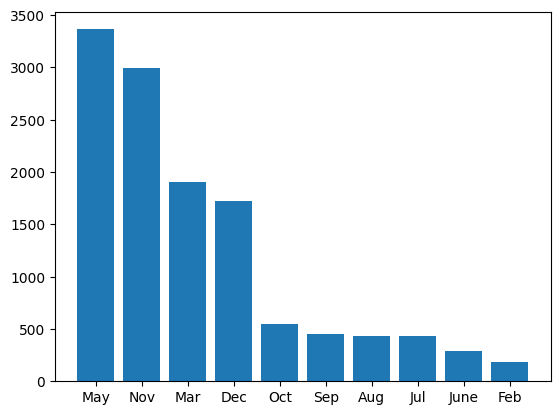

In [72]:
months = data['Month'].value_counts()
plt.bar(months.index,months.values)

# We can see here that the 'Month' column is missing January and April. We can see visually that several months have many samples (May, Nov) and a couple have very few samples (Feb, June).

C:\Users\DELL\AppData\Local\Temp\ipykernel_15336\2662651071.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['OperatingSystems'] = data['OperatingSystems'].replace([5,6,7,8],5)


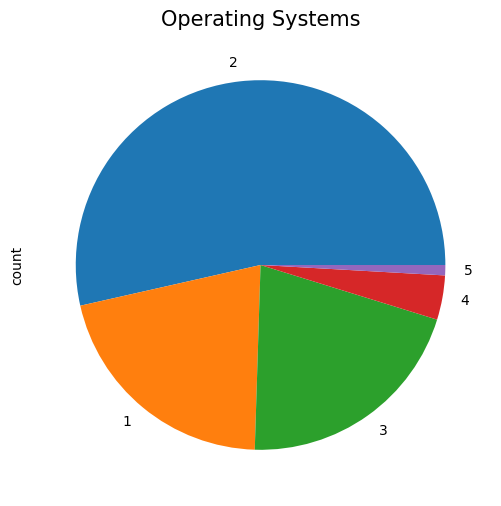

In [73]:
# #Operating Systems
data['OperatingSystems'] = data['OperatingSystems'].replace([5,6,7,8],5)
os_plot = data['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

Here we have the Operating Systems,labeled by number.

# Low-usage browsers have been consolidated into label '5'.
# We can see that a majority of users use operating system '2'.
# Operating systems can indicate users of a sepcifc type of computer and may portray certain user archetypes (Windows users, Mac users, Linux users).
# For now, we will exclude this column for our classifier.

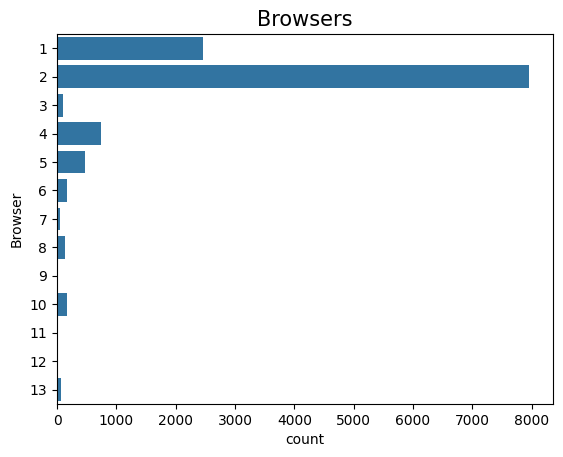

In [74]:
#Inspecting Browsers feature
sns.countplot(data['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

# Here we see that a large majority of users use browser 2, with a smaller number of users using browser 1. All other browsers represent a small subsection of online users. We will not use this as it does not contribute much to our model.

# There are several other columns that we leave out:

# 'Region': We leave regionality out because the regionality may be slightly tied to purchase likelihood, but we want to train our model on a smaller set of features if possible.

# 'TrafficType': We leave this column out because Traffic sources are not quite useful for calssifying if a user will make a purchase. It usually aids website owners in gauging traffic sources and can assist with determining where they should invest in advertisement.

# Weekend':There is weak correlation between days of the week and online shopping.Sundays and Mondays have the highest traffic for eCommerce , but only by 16% of weekly Target , and mostly on Monday, which is not classified as a weekend.

# We will keep page values as it has high effect on Target Variable
# ============================================

# BY keeping in mind , with result of statistical test and domain knowledge we will exclude below variables

In [75]:
# Removing unneccessary columns from data: shopping_clean using the above mentioned domain knowledge
data_clean = data.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [76]:
# Encoding Vistor Type
visitor_encoded = pd.get_dummies(data_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

In [77]:
data_clean_merged = pd.concat([data_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [78]:
data_clean_merged.astype(int)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Target,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,2,64,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,2,2,0,0,0,0,0,0,1
4,0,0,0,0,10,627,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145,0,0,53,1783,0,0,12,0,0,0,1
12326,0,0,0,0,5,465,0,0,0,0,0,0,1
12327,0,0,0,0,6,184,0,0,0,0,0,0,1
12328,4,75,0,0,15,346,0,0,0,0,0,0,1


In [79]:
# Split train and test data
X = data_clean_merged.drop('Target', axis=1)
y = data_clean_merged['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [82]:
# Fit models
lr = LogisticRegression(random_state=2, solver='liblinear').fit(X_train, y_train)
svm = SVC(probability=True, random_state=2).fit(X_train, y_train)
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750).fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)

# Make predictions
models = {
    "Logistic Regression": lr,
    "SVM": svm,
    "Random Forest": rfc,
    "Naive Bayes": gnb
}

# Print accuracies and F1 scores
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} accuracy: {round(accuracy * 100, 2)}%, F1 Score: {round(f1, 2)}")

Logistic Regression accuracy: 88.4%, F1 Score: 0.47
SVM accuracy: 86.17%, F1 Score: 0.05
Random Forest accuracy: 90.23%, F1 Score: 0.57
Naive Bayes accuracy: 84.63%, F1 Score: 0.49


# Random Forest stands out as the best model for this dataset in terms of accuracy with 90.23 % along with higher F1 score

In [88]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 90.23


The area under the ROC curve is: 0.89


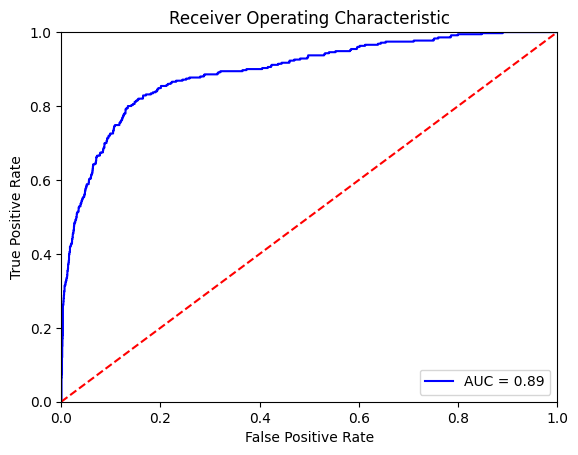

In [89]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.16


# Stratifying Training Data
# Because the training data is so heavily skewed in the direction of the 'False' category, we must stratify our training data so that the ratio of training labels is equal.

In [91]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [92]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb_stratified = GaussianNB() 
gnb_stratified.fit(X_train_stratified, y_train_stratified) 

# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified) 

# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

Stratified Gaussian Naive Bayes model accuracy(in %): 83.78


In [93]:
# Fit Random Forest Classifier to our Training Data
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 89.5


The area under the ROC curve for unbalanced data is: 0.89
The area under the ROC curve for stratified data is: 0.9


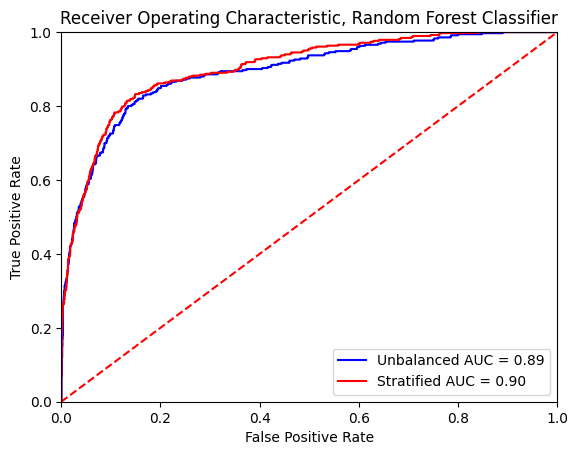

In [94]:
#Let us plot the ROC curve for the Random Forest Classifier for both the stratified data versus the unbalanced data.

roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# =================================================

# variables that are important for predicting the Target variable.

In [95]:
#Feature importance
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.698107)
2. Feature 7 (0.084048)
3. Feature 5 (0.059141)
4. Feature 4 (0.035484)
5. Feature 6 (0.033370)
6. Feature 0 (0.028572)
7. Feature 1 (0.028051)
8. Feature 11 (0.018375)
9. Feature 3 (0.007560)
10. Feature 2 (0.004090)
11. Feature 9 (0.002665)
12. Feature 10 (0.000538)


In [96]:
col_names = pd.Series([col for col in X_train.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.698107
ExitRates,0.084048
ProductRelated_Duration,0.059141
ProductRelated,0.035484
BounceRates,0.033370
Administrative,0.028572
Administrative_Duration,0.028051
Visitor_Type_Returning_Visitor,0.018375
Informational_Duration,0.007560
Informational,0.004090


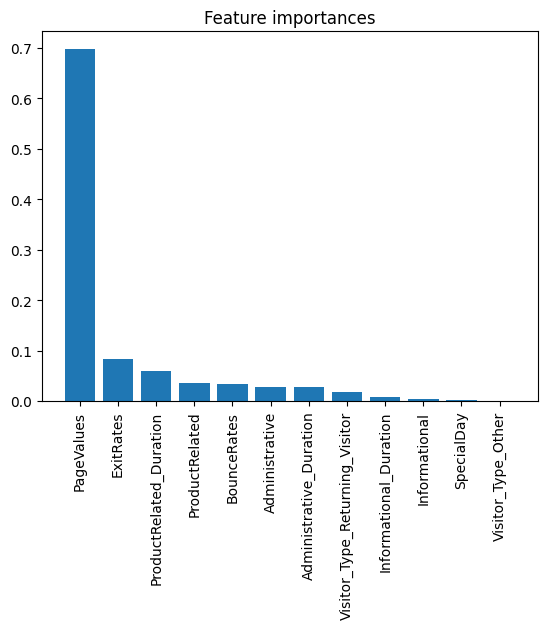

In [97]:
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices])
plt.xticks(range(X_train.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# We can see that the "Page Values" seems to be the most impactful feature by a large margin.

# Seeing these feature importances, we want to simplify our model to only use features that may heavily contribute to our classification. Using our feature importance chart, we will take the top 5 most impactful features: PageValues, ExitRates, ProductRelated_Duration, BounceRates, ProductRelated

# In addition, after creating the simplififed model, we want to measure the effectiveness of our model by using cross validation.


# ==================================================================

In [ ]:
# Creating simple model dataset
simple_model = data_clean_merged.drop(['Administrative_Duration','Administrative','BounceRates','Visitor_Type_Returning_Visitor',
                                       'Informational_Duration','Informational','SpecialDay','Visitor_Type_Other'], axis=1)

In [100]:
# Split train and test data
X_simp = simple_model.drop('Target', axis=1)
y_simp = simple_model['Target']
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

In [101]:
#Fitting RandomForestClassifier 
clf = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
scores = cross_val_score(clf, X_simp, y_simp, cv=cv)
print("Average Accuracy of Classifier over 10-folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Accuracy of Classifier over 10-folds: 0.90 (+/- 0.01)


In [ ]:
# Now lets compare our simplified model with our previous models:

X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp,stratify=y_simp, test_size=.2, shuffle=True, random_state=1)
clf_simp = RandomForestClassifier(max_depth=5, n_estimators=1000)

clf_simp.fit(X_train_simp,y_train_simp)
y_pred_simp = clf_simp.predict(X_test_simp)
y_prob_simp = clf_simp.predict_proba(X_test_simp)[:, 1]

fpr_simp, tpr_simp, threshold_strat = metrics.roc_curve(y_test_simp, y_prob_simp)
roc_auc_simp = metrics.auc(fpr_simp, tpr_simp)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# All three models seem to have similar performance

# Conclusion
# By using a random forest classifier, we are able to achieve approximately 90% accuracy.
# If we were to deploy this model, the most efficient model to select would be our simple model.
# The simple model performs similarly to our other models, and only bases its classification by five features.
# ====================THANK YOU=====================